In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [105]:
df = pd.read_excel("panel_data.xlsx")
df.head()

,NPI,State,Usage Time (mins),Region,Speciality
0,1000000000,NY,19,Northeast,Cardiology
1,1000000001,MI,42,Midwest,Oncology
2,1000000002,CA,26,West,Oncology
3,1000000003,TX,79,Northeast,Orthopedics
4,1000000004,GA,98,West,Oncology


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NPI                50000 non-null  int64 
 1   State              50000 non-null  object
 2   Usage Time (mins)  50000 non-null  int64 
 3   Region             50000 non-null  object
 4   Speciality         50000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [107]:
df['Speciality'].value_counts()

Speciality
Cardiology          7243
Orthopedics         7190
General Practice    7161
Pediatrics          7154
Neurology           7121
Radiology           7067
Oncology            7064
Name: count, dtype: int64

In [108]:
df['Region'].value_counts()

Region
Midwest      12601
West         12523
Northeast    12500
South        12376
Name: count, dtype: int64

In [109]:
speciality = input("Enter the speciality: ")
speciality_df = df.loc[df["Speciality"] == speciality]

In [110]:
speciality_percent = (len(speciality_df)/len(df))*100
speciality_percent

14.485999999999999

In [111]:
speciality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7243 entries, 0 to 49992
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NPI                7243 non-null   int64 
 1   State              7243 non-null   object
 2   Usage Time (mins)  7243 non-null   int64 
 3   Region             7243 non-null   object
 4   Speciality         7243 non-null   object
dtypes: int64(2), object(3)
memory usage: 339.5+ KB


If region is not input

In [112]:
regions = list(df['Region'].unique())
regions

['Northeast', 'Midwest', 'West', 'South']

In [113]:
regions_df_list = []
for region in regions:
    region_df = df.loc[(df['Speciality'] == speciality) & (df['Region'] == region)]
    regions_df_list.append(region_df)

In [114]:
regions_df_list[3]

,NPI,State,Usage Time (mins),Region,Speciality
20,1000000020,TX,12,South,Cardiology
29,1000000029,FL,109,South,Cardiology
50,1000000050,TX,31,South,Cardiology
71,1000000071,TX,42,South,Cardiology
130,1000000130,MI,19,South,Cardiology
...,...,...,...,...,...
49935,1000049935,IL,15,South,Cardiology
49956,1000049956,IL,51,South,Cardiology
49962,1000049962,MI,64,South,Cardiology
49990,1000049990,CA,48,South,Cardiology


In [115]:
region_wise_percent  = []
for dfs in regions_df_list:
    percent_speciality_wise = (len(dfs)/len(speciality_df)) * 100
    region_wise_percent.append(percent_speciality_wise)

In [116]:
region_wise_percent[3]

24.078420543973493

visualizations

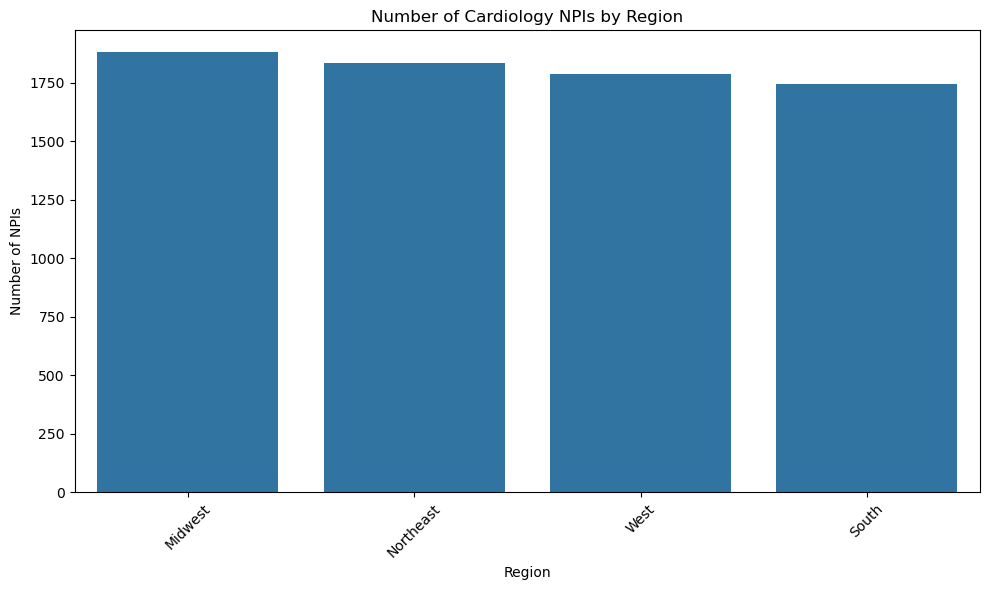

In [117]:
# 1. Number of NPIs in each region for the given specialty
plt.figure(figsize=(10, 6))
region_counts = speciality_df['Region'].value_counts().sort_values(ascending=False)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title(f'Number of {speciality} NPIs by Region')
plt.xlabel('Region')
plt.ylabel('Number of NPIs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

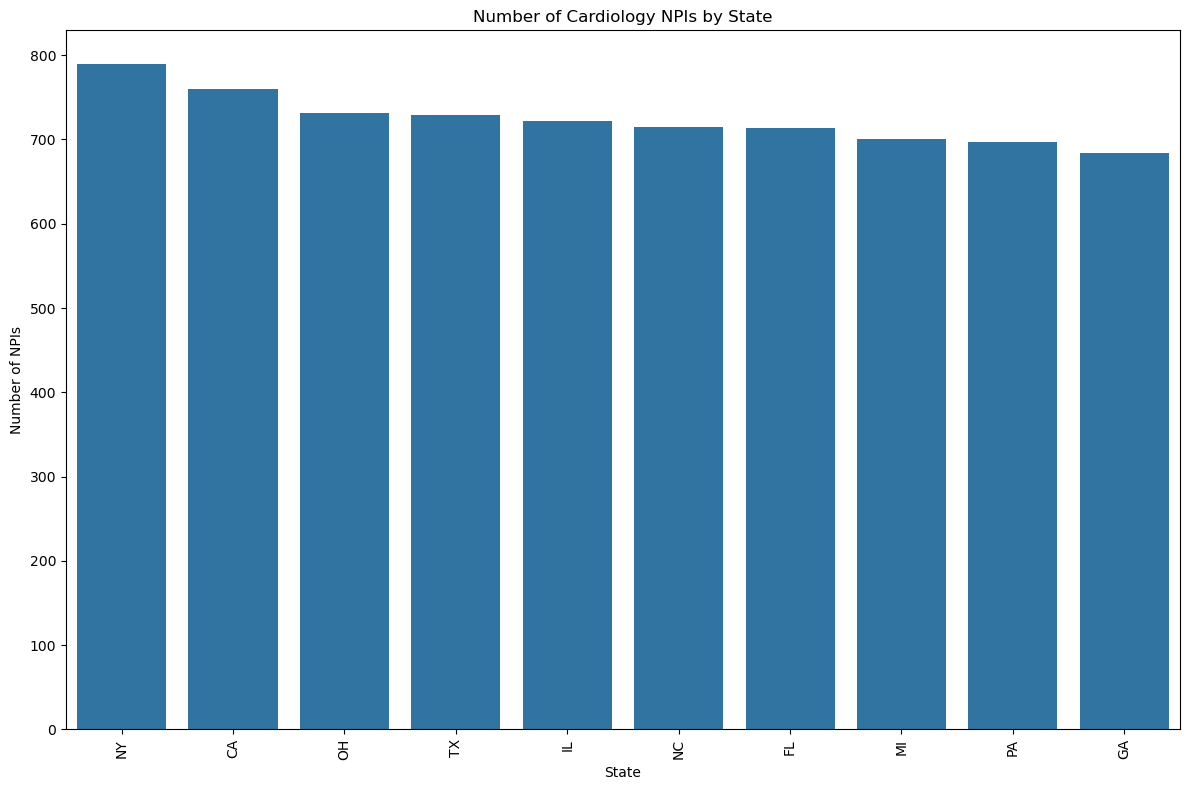

In [118]:
# 2. Number of NPIs in each state for the given specialty
plt.figure(figsize=(12, 8))
state_counts = speciality_df['State'].value_counts().sort_values(ascending=False)
# If there are too many states, you might want to show just the top ones
if len(state_counts) > 15:
    state_counts = state_counts.head(15)
    plt.title(f'Top 15 States with {speciality} NPIs')
else:
    plt.title(f'Number of {speciality} NPIs by State')
    
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('Number of NPIs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

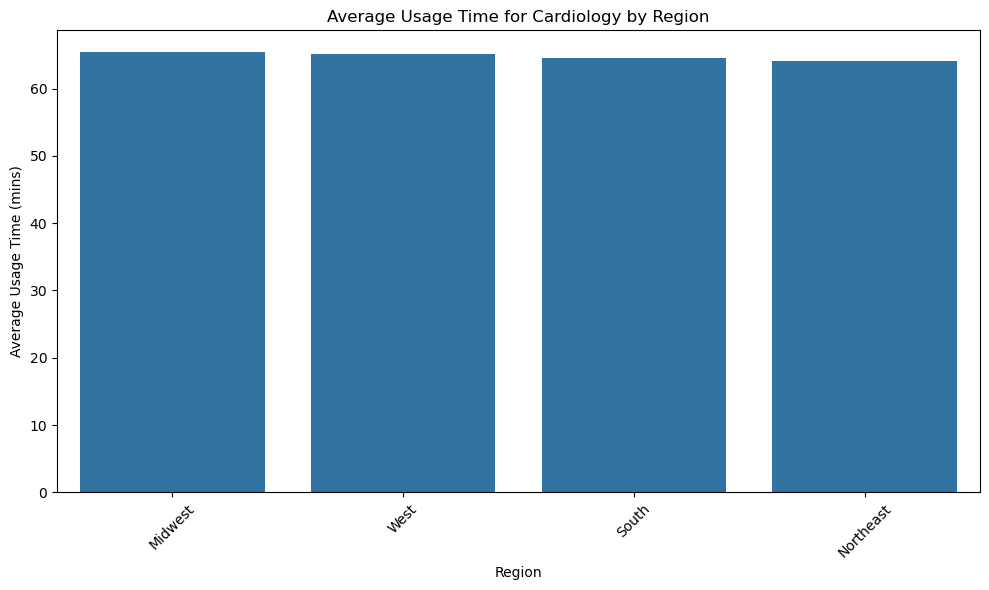

In [119]:
# 3. Average usage time for the specialty by region
plt.figure(figsize=(10, 6))
avg_usage_by_region = speciality_df.groupby('Region')['Usage Time (mins)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_usage_by_region.index, y=avg_usage_by_region.values)
plt.title(f'Average Usage Time for {speciality} by Region')
plt.xlabel('Region')
plt.ylabel('Average Usage Time (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

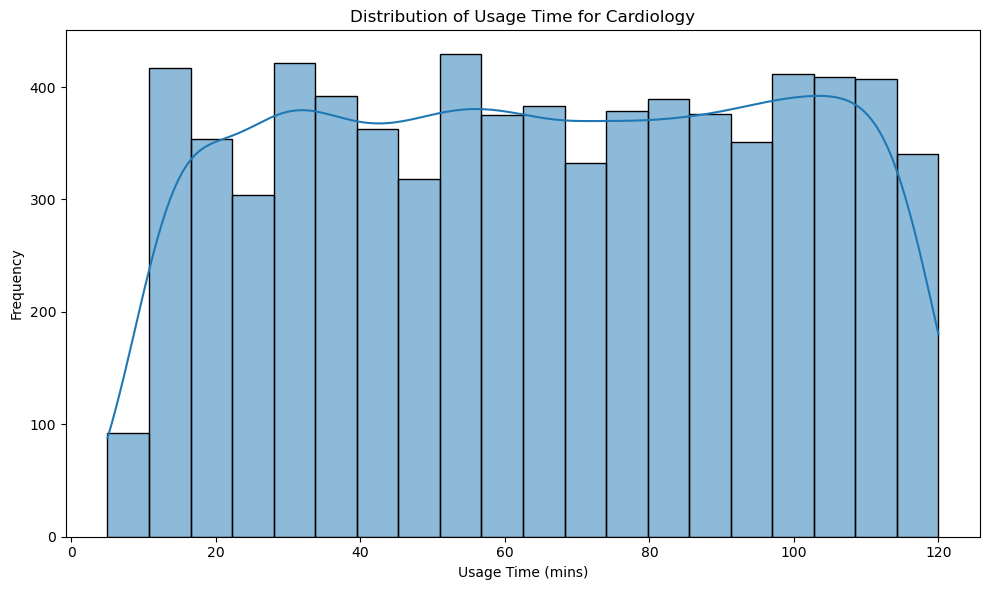

In [120]:
# 4. Distribution of Usage Time for the specialty
plt.figure(figsize=(10, 6))
sns.histplot(speciality_df['Usage Time (mins)'], kde=True, bins=20)
plt.title(f'Distribution of Usage Time for {speciality}')
plt.xlabel('Usage Time (mins)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

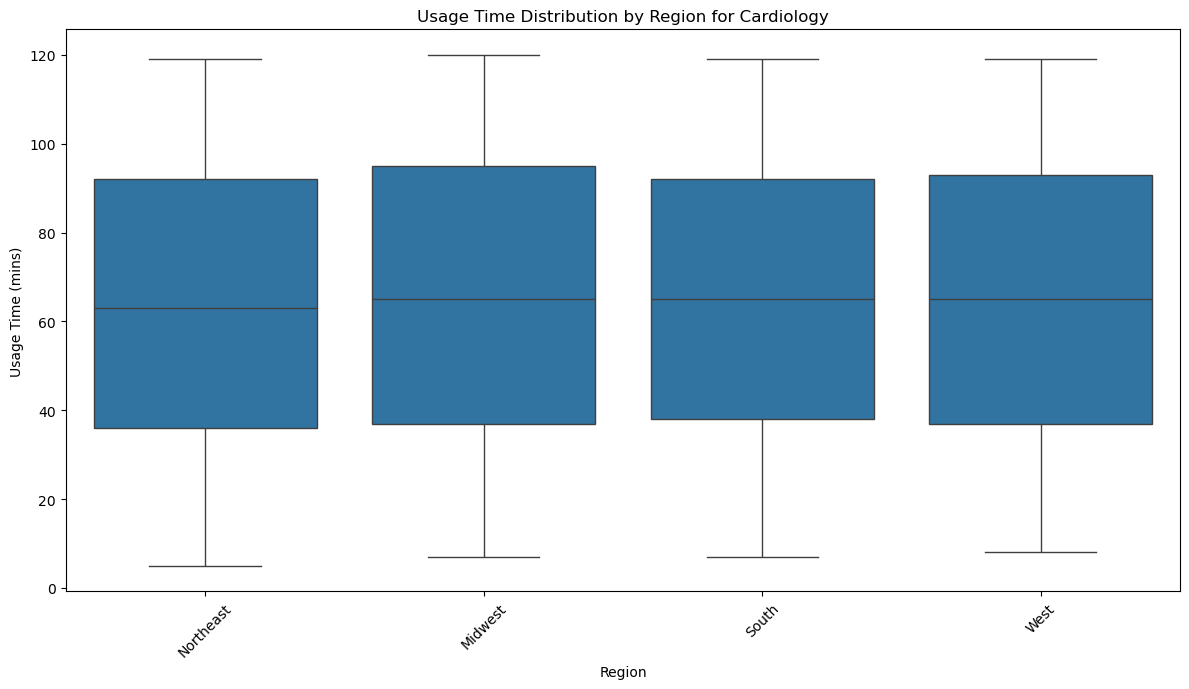

In [121]:
# 5. Box plot of Usage Time by Region for the specialty
plt.figure(figsize=(12, 7))
sns.boxplot(x='Region', y='Usage Time (mins)', data=speciality_df)
plt.title(f'Usage Time Distribution by Region for {speciality}')
plt.xlabel('Region')
plt.ylabel('Usage Time (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

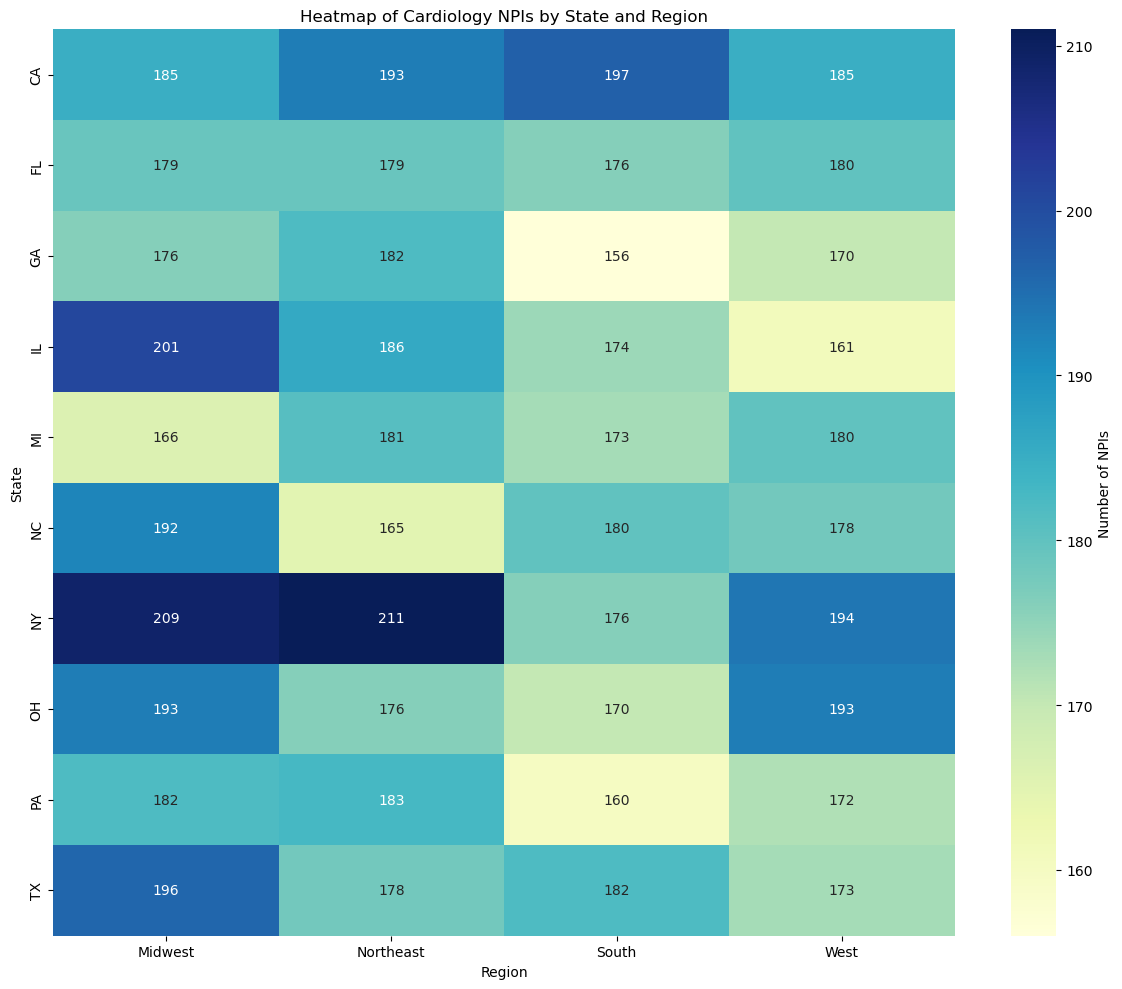

In [122]:
# 6. Heatmap of NPI count by State and Region
pivot_table = pd.crosstab(speciality_df['State'], speciality_df['Region'])
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of NPIs'})
plt.title(f'Heatmap of {speciality} NPIs by State and Region')
plt.tight_layout()
plt.show()

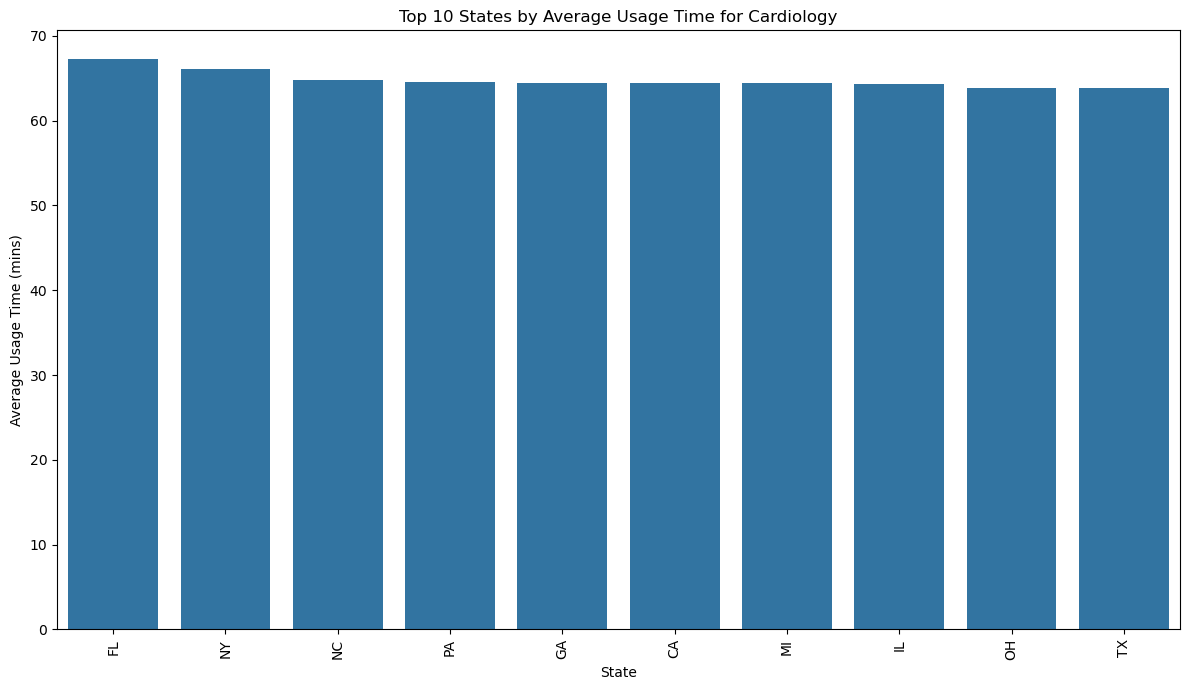

In [123]:
# 7. States with highest average usage time
state_avg_usage = speciality_df.groupby('State')['Usage Time (mins)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=state_avg_usage.index, y=state_avg_usage.values)
plt.title(f'Top 10 States by Average Usage Time for {speciality}')
plt.xlabel('State')
plt.ylabel('Average Usage Time (mins)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

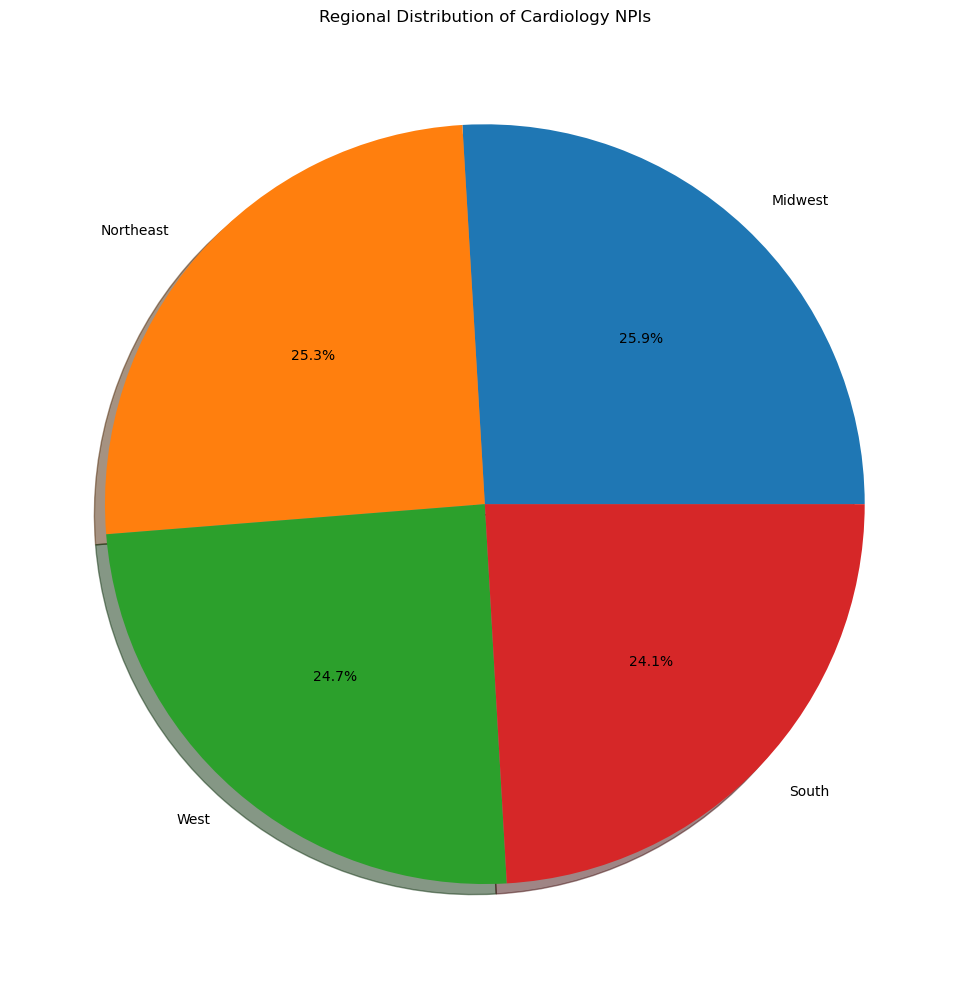

In [124]:
# 8. Pie chart showing the regional distribution of the specialty
plt.figure(figsize=(10, 10))
speciality_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title(f'Regional Distribution of {speciality} NPIs')
plt.ylabel('')  # Hide the ylabel
plt.tight_layout()
plt.show()

If region is the input

In [125]:
region = input("Enter the region: ")
spec_region_df = df.loc[(df['Speciality'] == speciality) & (df['Region'] == region)]
percent_speciality_wise = (len(spec_region_df)/len(speciality_df)) * 100

In [126]:
spec_region_df

,NPI,State,Usage Time (mins),Region,Speciality
0,1000000000,NY,19,Northeast,Cardiology
54,1000000054,GA,112,Northeast,Cardiology
79,1000000079,OH,7,Northeast,Cardiology
123,1000000123,CA,37,Northeast,Cardiology
164,1000000164,PA,6,Northeast,Cardiology
...,...,...,...,...,...
49807,1000049807,MI,57,Northeast,Cardiology
49830,1000049830,GA,88,Northeast,Cardiology
49842,1000049842,FL,31,Northeast,Cardiology
49879,1000049879,IL,99,Northeast,Cardiology


Visualizations

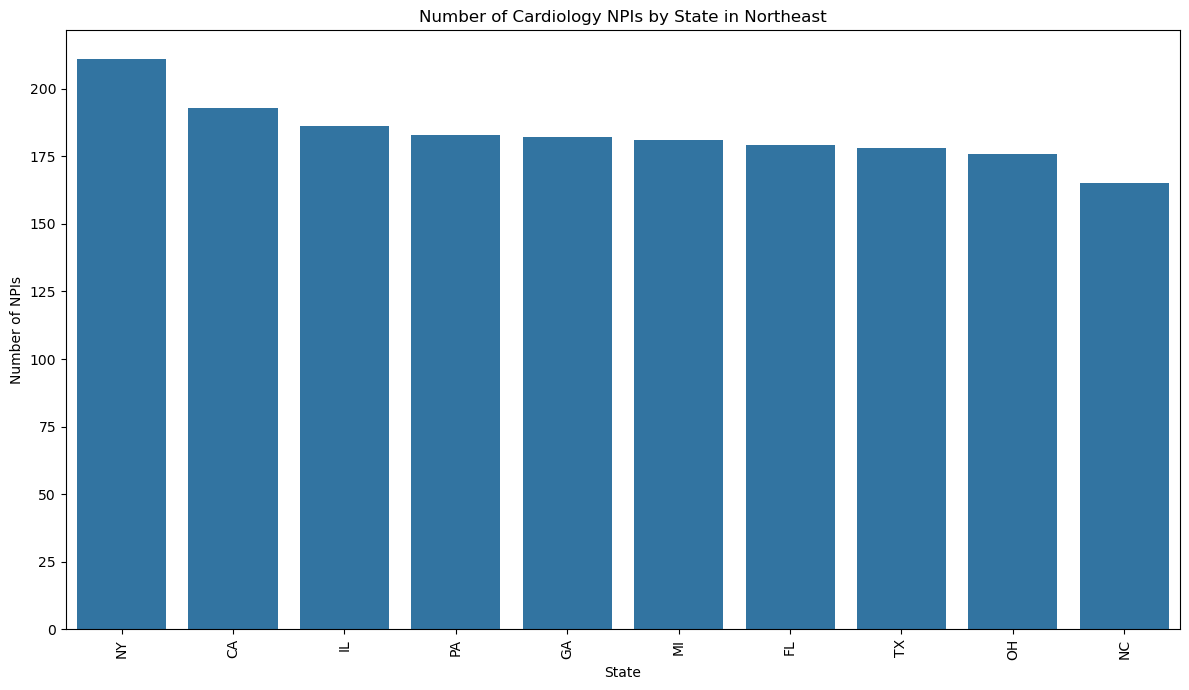

In [127]:
# 1. State-wise NPIs available in the selected region for the selected specialty
plt.figure(figsize=(12, 7))
state_counts = spec_region_df['State'].value_counts().sort_values(ascending=False)
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title(f'Number of {speciality} NPIs by State in {region}')
plt.xlabel('State')
plt.ylabel('Number of NPIs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

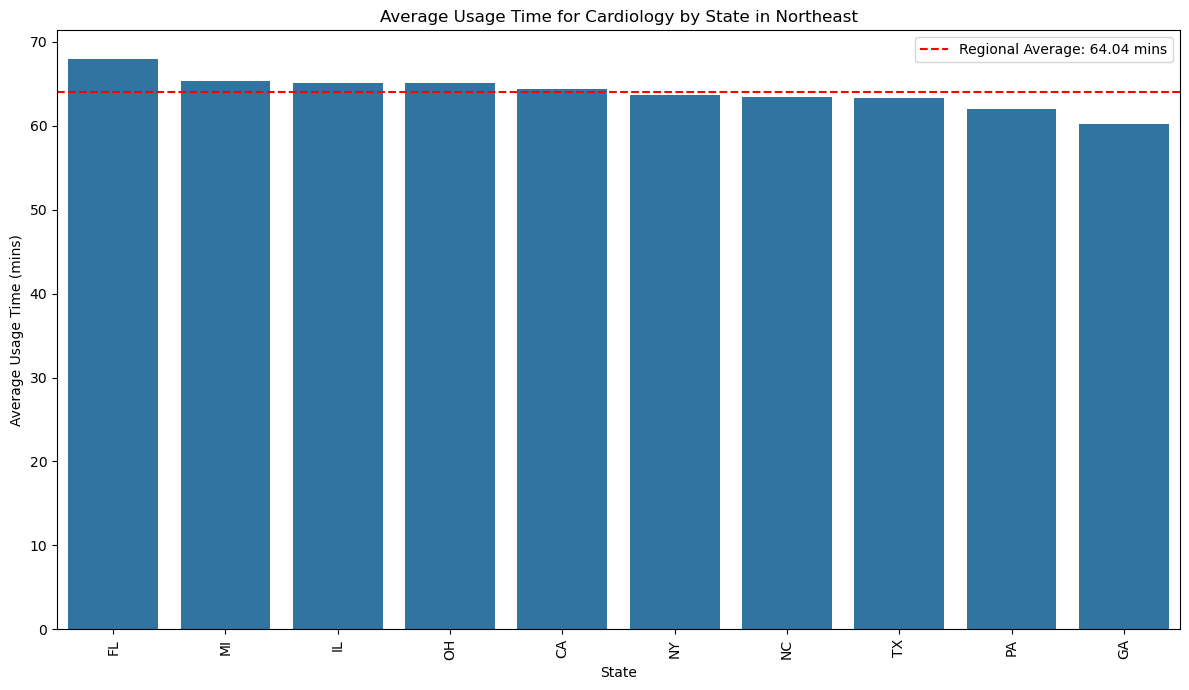

In [128]:
# 2. Average usage time by state in the selected region for the selected specialty
plt.figure(figsize=(12, 7))
avg_usage_by_state = spec_region_df.groupby('State')['Usage Time (mins)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_usage_by_state.index, y=avg_usage_by_state.values)
plt.title(f'Average Usage Time for {speciality} by State in {region}')
plt.xlabel('State')
plt.ylabel('Average Usage Time (mins)')
plt.xticks(rotation=90)
plt.axhline(y=spec_region_df['Usage Time (mins)'].mean(), color='r', linestyle='--', 
           label=f'Regional Average: {spec_region_df["Usage Time (mins)"].mean():.2f} mins')
plt.legend()
plt.tight_layout()
plt.show()

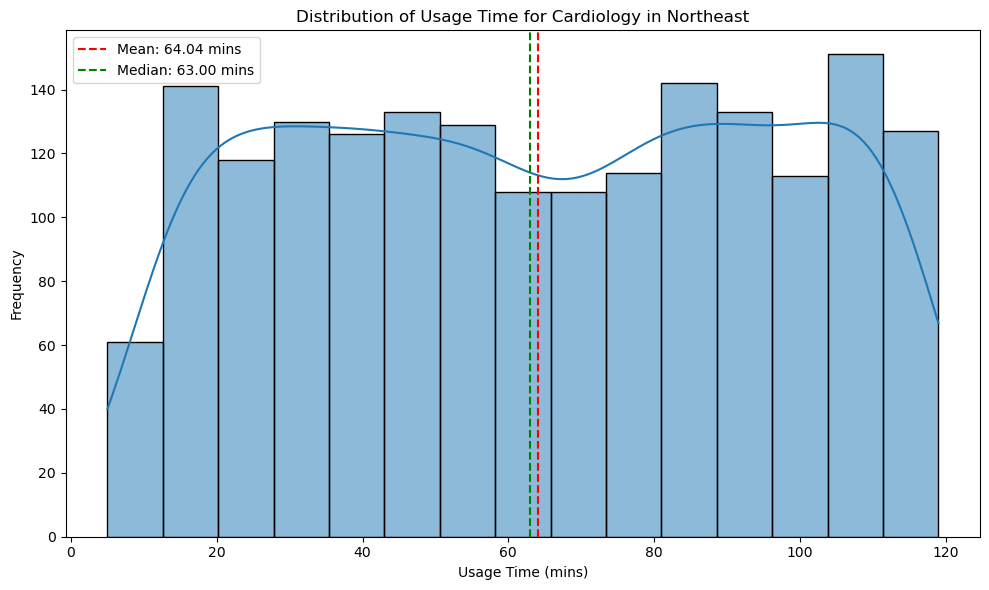

In [129]:
# 3. Distribution of usage time for the specialty in the region
plt.figure(figsize=(10, 6))
sns.histplot(spec_region_df['Usage Time (mins)'], kde=True, bins=15)
plt.title(f'Distribution of Usage Time for {speciality} in {region}')
plt.xlabel('Usage Time (mins)')
plt.ylabel('Frequency')
plt.axvline(x=spec_region_df['Usage Time (mins)'].mean(), color='r', linestyle='--', 
           label=f'Mean: {spec_region_df["Usage Time (mins)"].mean():.2f} mins')
plt.axvline(x=spec_region_df['Usage Time (mins)'].median(), color='g', linestyle='--', 
           label=f'Median: {spec_region_df["Usage Time (mins)"].median():.2f} mins')
plt.legend()
plt.tight_layout()
plt.show()

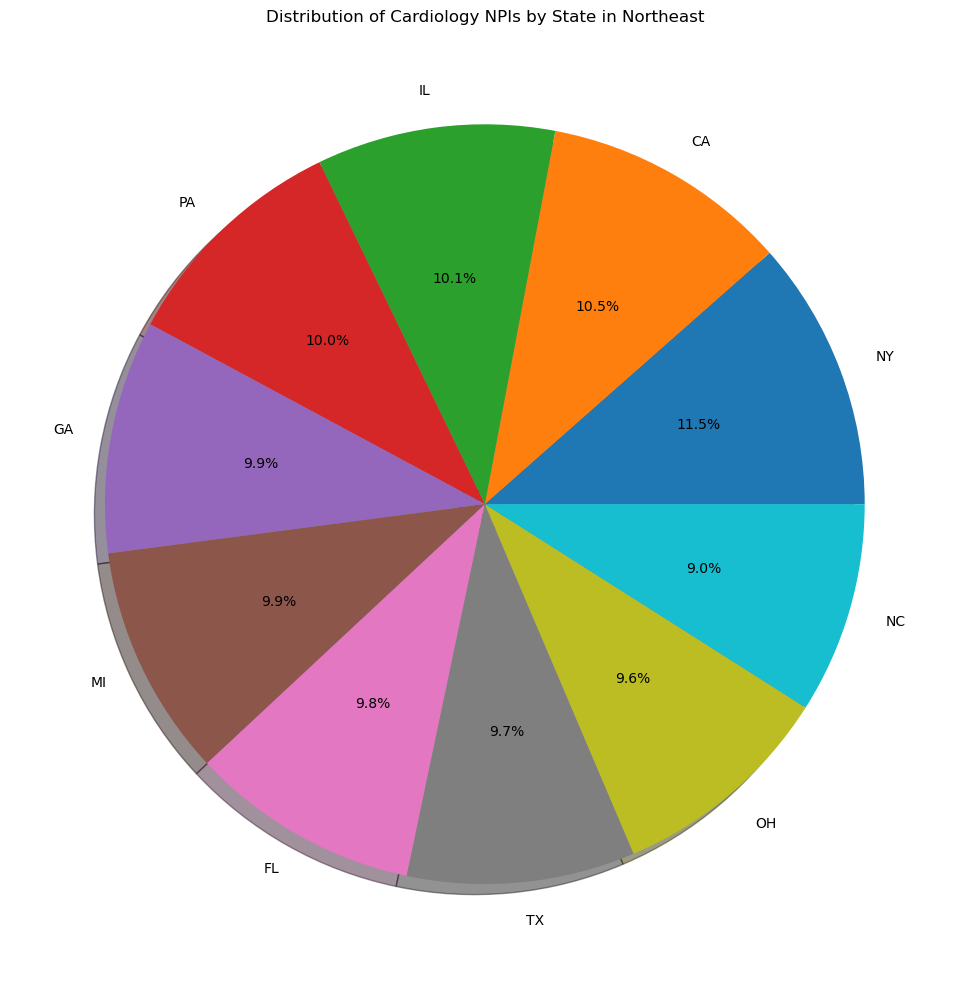

In [130]:
# 4. Pie chart showing the proportion of states within the region for this specialty
if len(state_counts) > 1:  # Only if there's more than one state
    plt.figure(figsize=(10, 10))
    state_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True)
    plt.title(f'Distribution of {speciality} NPIs by State in {region}')
    plt.ylabel('')  # Hide the ylabel
    plt.tight_layout()
    plt.show()

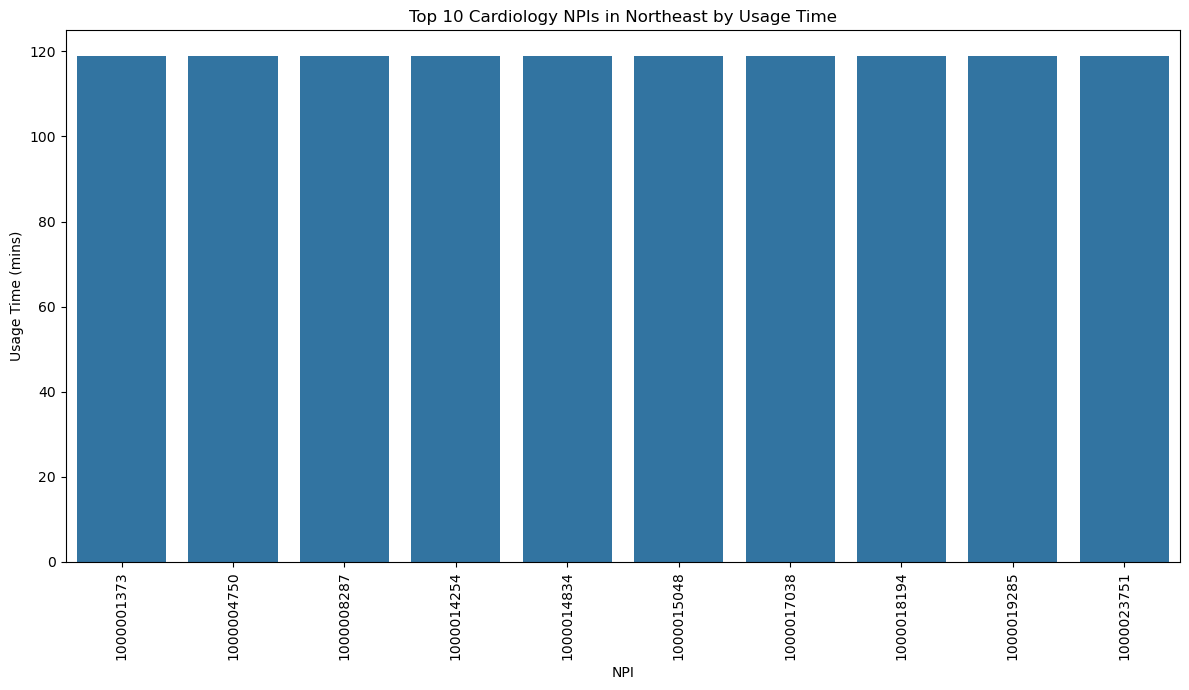

In [ ]:
# 5. Comparison of top NPIs in this region by usage time
if len(spec_region_df) > 0:
    top_npis = spec_region_df.sort_values('Usage Time (mins)', ascending=False).head(10)
    plt.figure(figsize=(12, 7))
    sns.barplot(x='NPI', y='Usage Time (mins)', data=top_npis)
    plt.title(f'Top 10 {speciality} NPIs in {region} by Usage Time')
    plt.xlabel('NPI')
    plt.ylabel('Usage Time (mins)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

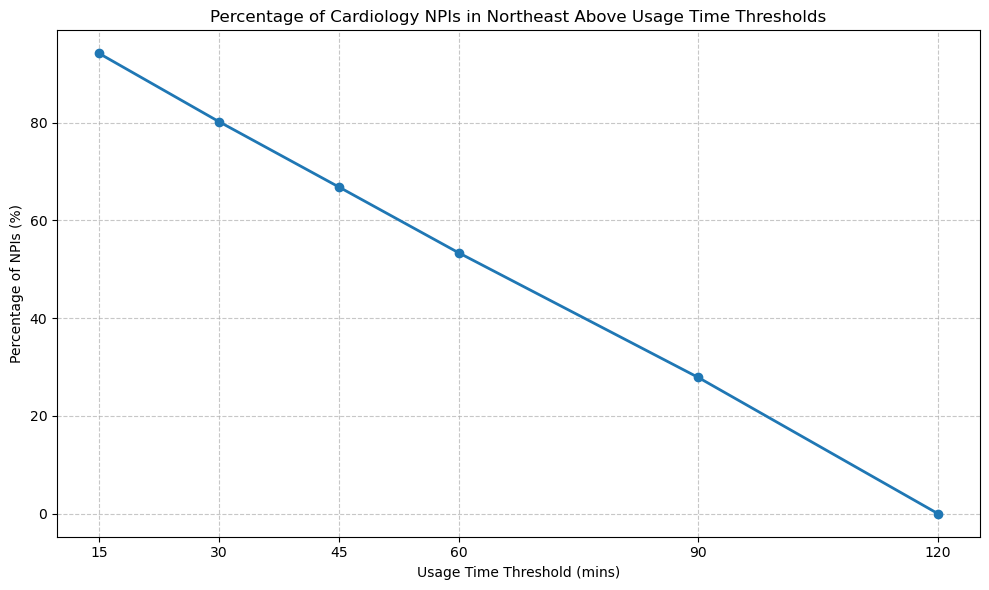

In [ ]:
# 6. Usage time threshold analysis - Percentage of NPIs above certain thresholds
thresholds = [15, 30, 45, 60, 90, 120]
percentages = []
for threshold in thresholds:
    percent_above = (spec_region_df['Usage Time (mins)'] >= threshold).mean() * 100
    percentages.append(percent_above)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, percentages, marker='o', linestyle='-', linewidth=2)
plt.title(f'Percentage of {speciality} NPIs in {region} Above Usage Time Thresholds')
plt.xlabel('Usage Time Threshold (mins)')
plt.ylabel('Percentage of NPIs (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(thresholds)
plt.tight_layout()
plt.show()